In [14]:
import numpy as np

import numpy as np
from scipy.signal import convolve2d

# Define the original matrix
matrix = np.array([
    [34, 67, 123, 89, 56],
    [12, 200, 189, 56, 78],
    [98, 45, 34, 12, 67],
    [56, 89, 145, 34, 23],
    [78, 134, 56, 67, 123]
])

# Define the kernel matrix
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Perform convolution
result = convolve2d(matrix, kernel, mode='valid')

print("Original Matrix:\n", matrix)
print("Kernel Matrix:\n", kernel)
print("Resulting Matrix after Convolution:\n", result)


Original Matrix:
 [[ 34  67 123  89  56]
 [ 12 200 189  56  78]
 [ 98  45  34  12  67]
 [ 56  89 145  34  23]
 [ 78 134  56  67 123]]
Kernel Matrix:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Resulting Matrix after Convolution:
 [[ 202 -155 -145]
 [ 202 -232 -200]
 [   3 -155  -22]]


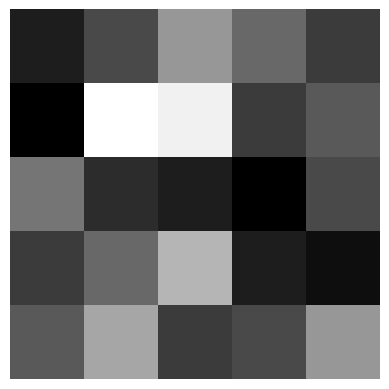

In [5]:
import matplotlib.pyplot as plt

# Display the matrix as an image
plt.imshow(matrix, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Create a Sequential model
model = Sequential()

model.add(Input(shape=(32, 32, 3)))

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Add fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

d:\09_Project_2024\04_DeepLearning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import os

# Define the CNN model
def create_cnn_model():
    model = models.Sequential()
    
    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flattening Layer
    model.add(layers.Flatten())
    
    # Fully Connected Layer 1
    model.add(layers.Dense(512, activation='relu'))
    
    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for classification
    
    return model

# Create the model
cnn_model = create_cnn_model()

# Print the model summary
cnn_model.summary()

# Ensure the file path is correct and you have write permissions
output_file = 'cnn_model.png'

try:
    # Plot the model architecture
    plot_model(cnn_model, to_file=output_file, show_shapes=True, show_layer_names=True)
    print(f"Model architecture saved to {output_file}")
except Exception as e:
    print(f"An error occurred: {e}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 9, 9, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,312,842 (5.01 MB)

 Trainable params: 1,312,842 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

Model architecture saved to cnn_model.png


In [13]:
14*14*24

4704

1) AlexNet
2) VGGNet
3) GoogleNet
4) ResNet
5) EfficientNet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the AlexNet model
model = Sequential()

# Layer 1: Convolutional layer with 96 filters, each of size 11x11, stride of 4x4, and activation function ReLU
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))

# Layer 2: Max pooling layer with pool size 3x3 and stride of 2x2
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3: Convolutional layer with 256 filters, each of size 5x5, and activation function ReLU
model.add(Conv2D(256, (5, 5), activation='relu'))

# Layer 4: Max pooling layer with pool size 3x3 and stride of 2x2
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 5: Convolutional layer with 384 filters, each of size 3x3, and activation function ReLU
model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 6: Convolutional layer with 384 filters, each of size 3x3, and activation function ReLU
model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 7: Convolutional layer with 256 filters, each of size 3x3, and activation function ReLU
model.add(Conv2D(256, (3, 3), activation='relu'))

# Layer 8: Max pooling layer with pool size 3x3 and stride of 2x2
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 9: Flatten layer
model.add(Flatten())

# Layer 10: Fully connected layer with 4096 units and activation function ReLU
model.add(Dense(4096, activation='relu'))

# Layer 11: Dropout layer with dropout rate of 0.5
model.add(Dropout(0.5))

# Layer 12: Fully connected layer with 4096 units and activation function ReLU
model.add(Dense(4096, activation='relu'))

# Layer 13: Dropout layer with dropout rate of 0.5
model.add(Dropout(0.5))

# Layer 14: Fully connected layer with 1000 units (assuming 1000 classes for classification) and activation function softmax
model.add(Dense(1000, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()